In [1]:
# TASK: Basic Sales Summary (SQLite + Python)

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\UDAY\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# 1. Connect to SQLite database

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# 2. Create Sales Table

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# 3. Insert Sample Data

cursor.execute("DELETE FROM sales")  # Clear old data (optional)

sample_data = [
    ("Laptop", 5, 50000),
    ("Mobile", 10, 20000),
    ("Tablet", 7, 15000),
    ("Laptop", 3, 52000),
    ("Mobile", 4, 21000),
    ("Tablet", 6, 14000)
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
    sample_data
)

conn.commit()

In [5]:
# 4. Run SQL Query

query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)

In [6]:
# 5. Display Results

print("===== SALES SUMMARY =====")
print(df)

===== SALES SUMMARY =====
  product  total_qty   revenue
0  Laptop          8  406000.0
1  Mobile         14  284000.0
2  Tablet         13  189000.0


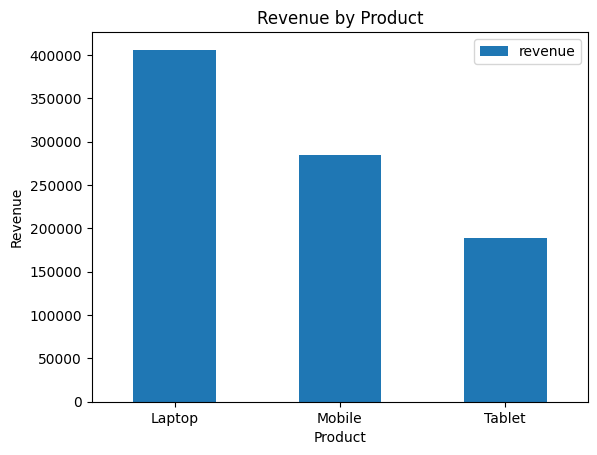

In [7]:
# 6. Plot Revenue Bar Chart

df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

In [8]:
# 7. Close Connection

conn.close()